In [110]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

red_wine = pd.read_excel('wine-data/winequality-red.xlsx', skiprows = 1)
white_wine = pd.read_excel('wine-data/winequality-white.xlsx', skiprows = 1)

red_wine['type'] = 'red'
white_wine['type'] = 'white'

both_wine = pd.concat([red_wine, white_wine], ignore_index=True)

In [111]:
# To transform the categorical data into numeric values we can look at the 'type' column in our data to initialize them as 1 and 2, using map.
# 1 being Red Wine
# 2 being White Wine
both_wine['type_code'] = both_wine['type'].map({'red': 1, 'white': 2})

In [112]:
numeric_cols = both_wine.select_dtypes(include='number').columns

In [113]:
both_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_code
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,2
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,2


In [114]:
both_wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [115]:
both_wine.groupby('type')['quality'].max()

type
red      8
white    9
Name: quality, dtype: int64

In [116]:
corr_matrix = both_wine.drop(columns='type_code').corr(numeric_only=True)

This is a correlation matrix for all the numeric features in your both_wine DataFrame. Each cell shows the Pearson correlation coefficient between two variables, ranging from –1 (perfect inverse linear relationship) to +1 (perfect direct linear relationship).

Examining this data for key takeaways we can safely assume that alcohol and quality columns have the strongest correlation in the dataset. Meaning the higher the alcohol content of the wine the higher its quality is usually, - which is something everyone can already agree with.

When looking for the lowest influence on the quality of wine, we look for the most negative number which is density. Density then least affects the quality of the wine.

In [117]:
both_wine[['alcohol', 'quality']].corr()

,alcohol,quality
alcohol,1.000000,0.444319
quality,0.444319,1.000000


In [118]:
both_wine[['alcohol', 'density']].corr()

,alcohol,density
alcohol,1.000000,-0.686745
density,-0.686745,1.000000


This sentiment can also be represented using a scatterplot: 

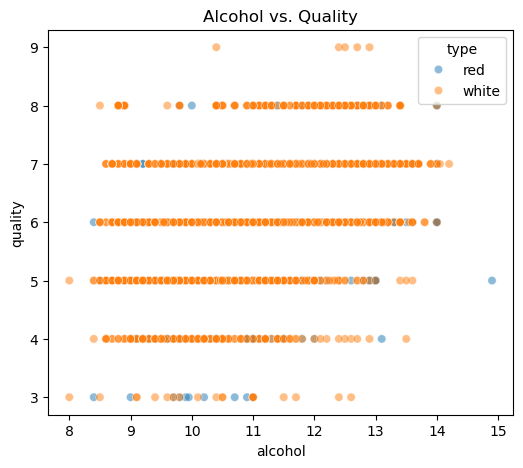

In [119]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='alcohol', y='quality', hue='type', data=both_wine, alpha=0.5)
plt.title('Alcohol vs. Quality')
plt.show()

The overall trend is clear: higher alcohol content generally corresponds with higher quality, visible from how more dots (clustering) appear in the upper-right portion of the chart. The few high-quality wines (8–9) tend to have higher alcohol content. 
This pattern shows a general upward trend: as you go right (more alcohol), the dots shift higher up on the graph (higher quality).

If you look around 12–14% alcohol, there are lots of dots around quality 7 or 8. If you look at 8–10% alcohol, most dots are around quality 3 to 5.

This tells us that wines with more alcohol are more likely to get better scores.

In [120]:
desc_stats = both_wine.describe()
print(desc_stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

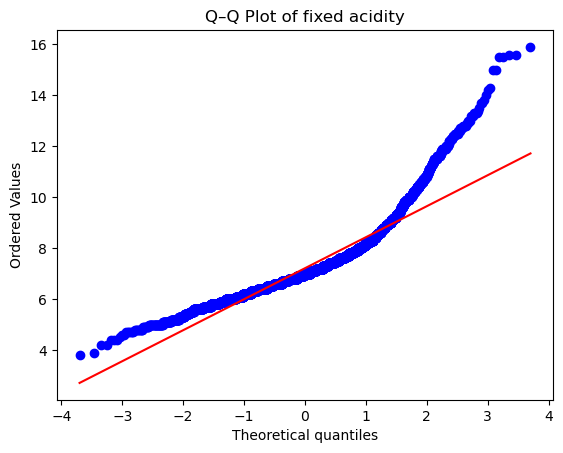

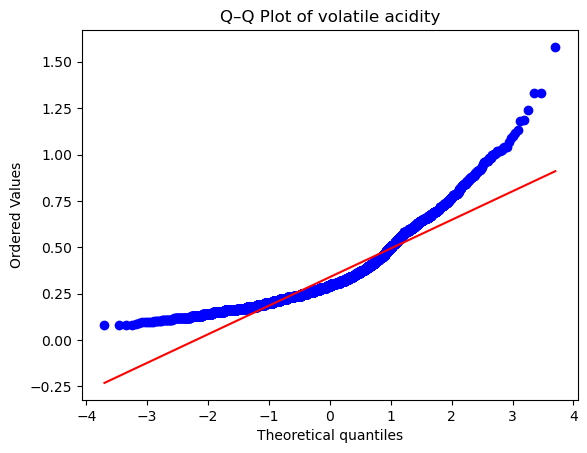

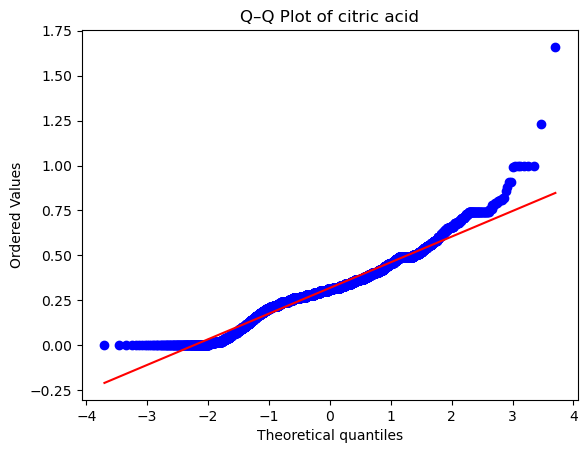

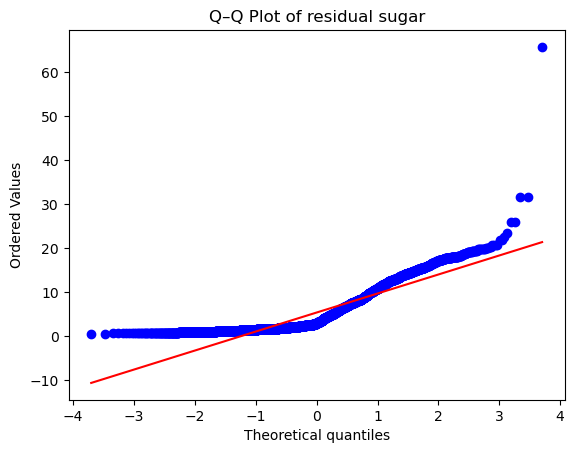

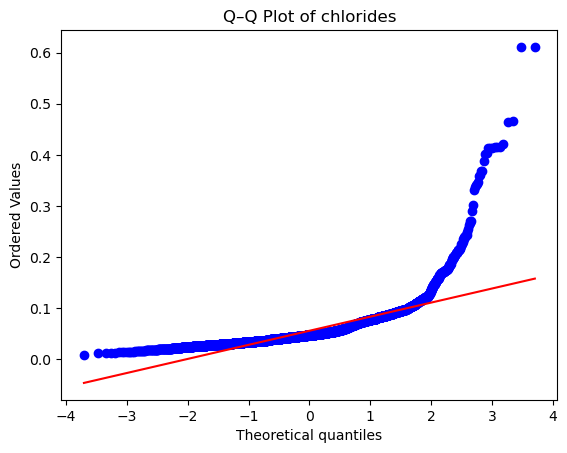

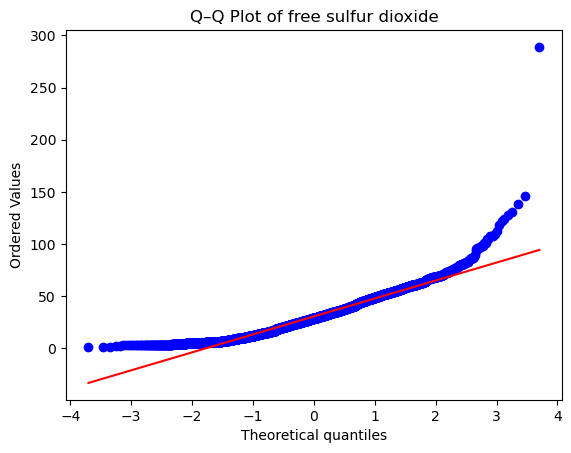

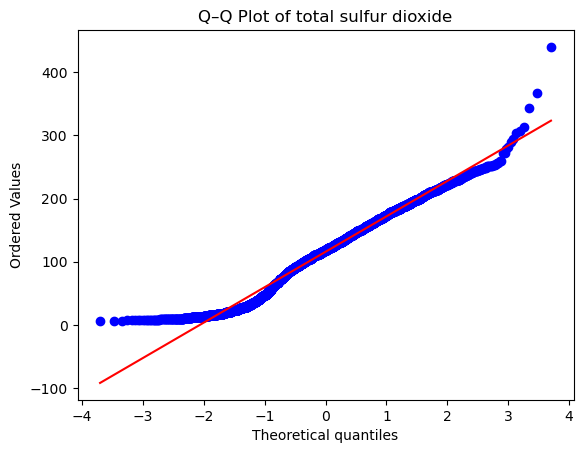

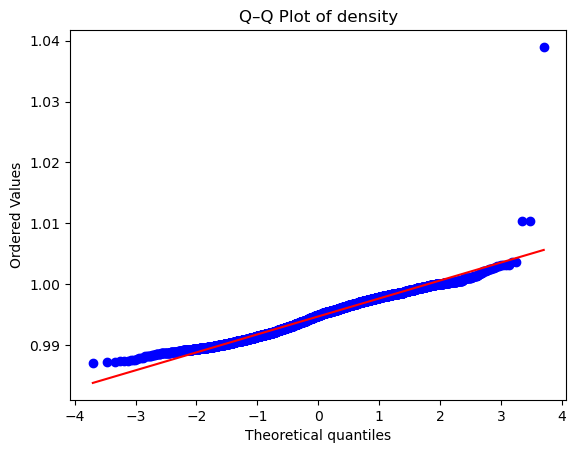

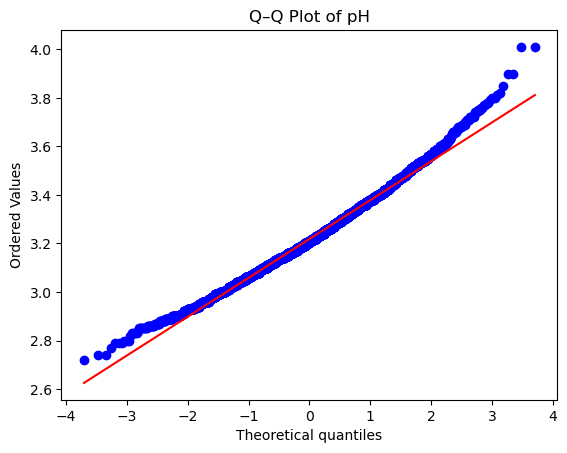

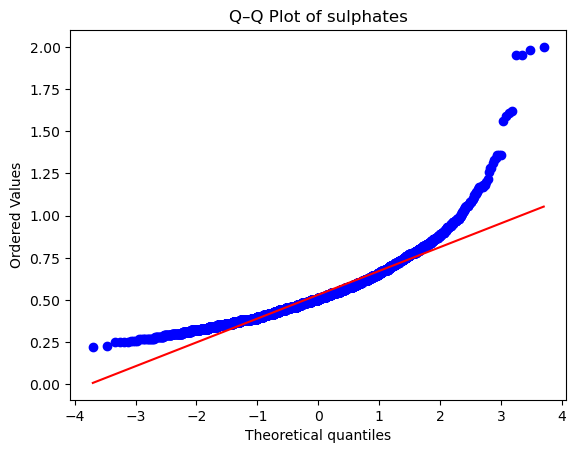

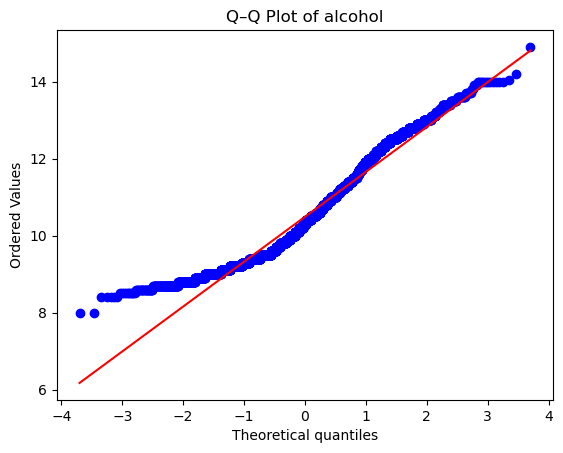

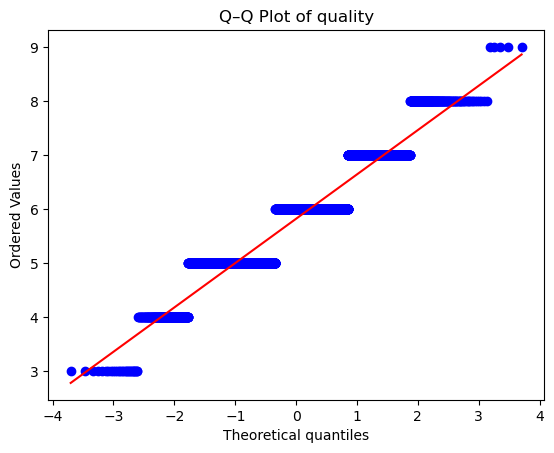

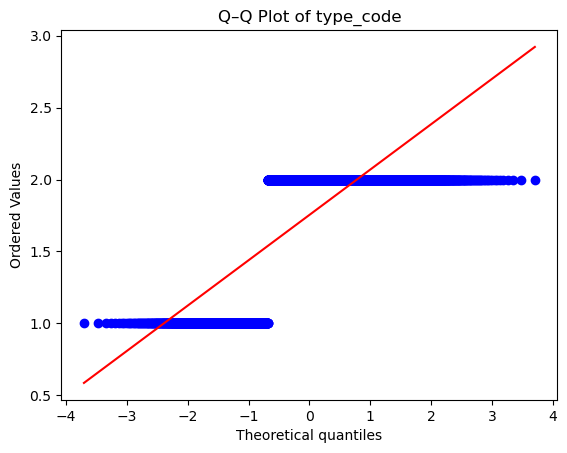

In [121]:
for col in numeric_cols:
    plt.figure()
    stats.probplot(both_wine[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q–Q Plot of {col}")
    plt.show()


Examining the Q-Q plot diagrams for the data as numeric values we can generally assume that if the data-points are roughly on the 45 degree line, we can assume that the data is normal - as seen in for example in pH, density and quality, meaning that the data is "safe" and can be worked with under normality assumptions. Volatile acidity for example has more of an S-shaped curve indicating a deviation from normality.

What the fuck does this actually mean? Essentially if the data is normal it means there are no extreme outliers, no Michael Jordans (salary class example) in the data. So its assumed safe to work with. The opposite is true if the data isn't normal, and we may need a more in depth understanding of the data i.e. see who the fuck the Michael Jordan/Jordans in our data is/are.

Knowing that quality has no crazy outliers we can represent quality by winetype and check which wine usually has better quality using a boxplot: 

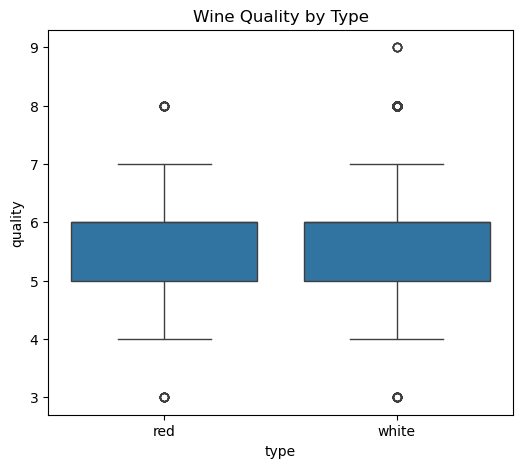

In [122]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='type', y='quality', data=both_wine)
plt.title('Wine Quality by Type')
plt.show()

Generally we can see that there is no considerable difference between red and white wine in terms of quality, although if you zoom in using a microscope you can see that white wine is still a small bit higher, and we can also confirm this by calculating the mean.

In [123]:
both_wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

We saw in the correlation matrix that the higher the alcohol the higher the quality. We can now group the wines by alcohol, and see which type wine usually has higher alcohol percentage. We expect the result of this to be that white wine usually has the higher alcohol percentage which will further support the rest of our data. 

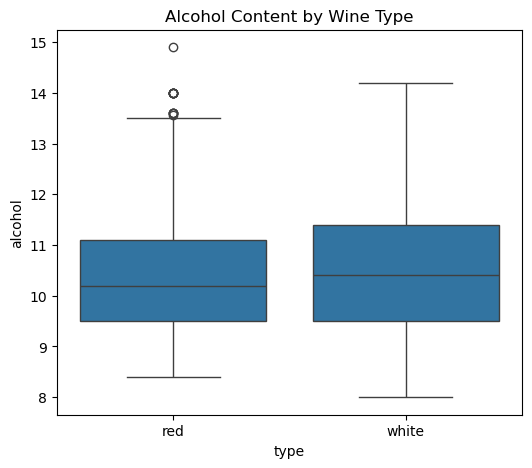

In [124]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='type', y='alcohol', data=both_wine)
plt.title('Alcohol Content by Wine Type')
plt.show()

The result is as hypothesized. White wine tends to be rated higher in terms of quality and tends to have a higher alcohol percentage.

In [125]:
both_wine.groupby('type')['alcohol'].mean()

type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64

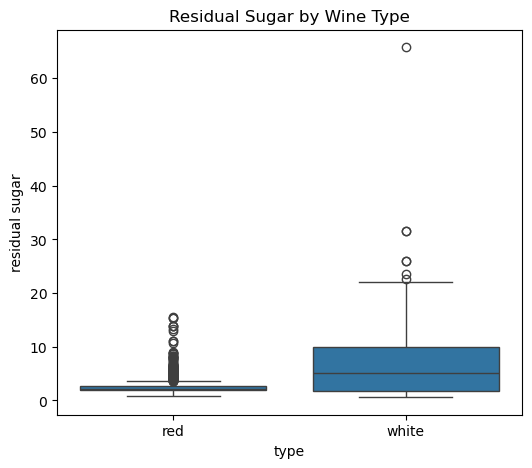

In [126]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='type', y='residual sugar', data=both_wine)
plt.title('Residual Sugar by Wine Type')
plt.show()

White wine has significantly more residual sugar but as seen in our correlation matrix residual sugar does not impact the quality of wine significantly. It's pearson correlation being 0.036980, so very little to nothing impact. We can check this further using a scatterplot:

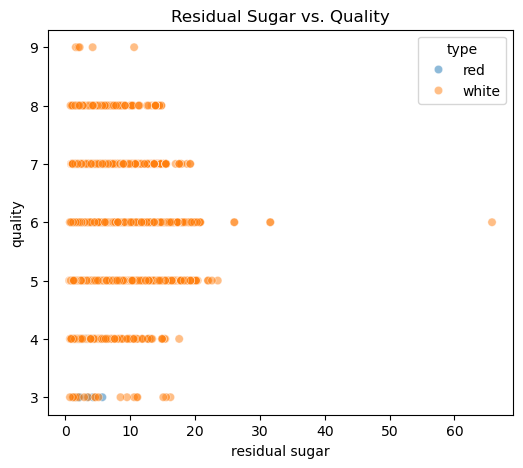

In [127]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='residual sugar', y='quality', hue='type', data=both_wine, alpha=0.5)
plt.title('Residual Sugar vs. Quality')
plt.show()

We can see in the scatterplot, that there are some outliers, especially in the white wine entries. Values above 25 g/L are rare and far from the data cluster.

In [128]:
Q1 = both_wine['residual sugar'].quantile(0.25)
Q3 = both_wine['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outlier rows
outliers = both_wine[(both_wine['residual sugar'] < lower_bound) | (both_wine['residual sugar'] > upper_bound)]

# Display the rows with outliers
print("Outlier rows (based on residual sugar):")
print(outliers[['residual sugar', 'type']])
print("\nIndex positions of outlier rows:")
print(outliers.index.tolist())
print("\nNumber of outliers:")
print(len(outliers))

Outlier rows (based on residual sugar):
      residual sugar   type
1599           20.70  white
1606           20.70  white
1613           19.25  white
1637           17.95  white
1638           17.95  white
...              ...    ...
6290           19.25  white
6293           19.25  white
6347           18.35  white
6348           18.40  white
6377           19.40  white

[118 rows x 2 columns]

Index positions of outlier rows:
[1599, 1606, 1613, 1637, 1638, 1702, 1710, 1773, 1781, 1790, 1824, 1828, 1860, 1864, 1891, 1997, 2002, 2009, 2013, 2043, 2068, 2207, 2229, 2230, 2316, 2361, 2362, 2545, 2642, 2844, 3035, 3053, 3086, 3088, 3123, 3128, 3165, 3207, 3252, 3262, 3279, 3283, 3286, 3321, 3374, 3392, 3447, 3487, 3491, 3492, 3572, 3573, 3650, 3651, 3655, 3763, 3933, 3995, 4010, 4018, 4088, 4091, 4096, 4097, 4099, 4179, 4219, 4380, 4384, 4386, 4608, 4613, 4622, 4730, 4861, 5019, 5037, 5043, 5096, 5144, 5146, 5218, 5222, 5231, 5250, 5252, 5277, 5293, 5300, 5317, 5329, 5479, 5480, 5483, 5

As we can see, there are 118 outliers in both wines. I have here found the outliers in the 0.25 & 0.75 quantiles to outliers on both sides. Now i have to remove them.

In [129]:
both_wine_no_outliers = both_wine.drop(outliers.index).reset_index(drop=True)

Now lets check and see if it worked. First we look at how many outliers have been removed. Then we check, if the extreme values are still there, and finally we make two boxplots to see the difference.

In [130]:
print("Original number of rows:", len(both_wine))
print("Number of rows after outlier removal:", len(both_wine_no_outliers))
print("Number of rows removed:", len(both_wine) - len(both_wine_no_outliers))

Original number of rows: 6497
Number of rows after outlier removal: 6379
Number of rows removed: 118


In [131]:
print("Max residual sugar before:", both_wine['residual sugar'].max())
print("Max residual sugar after:", both_wine_no_outliers['residual sugar'].max())

Max residual sugar before: 65.8
Max residual sugar after: 17.5


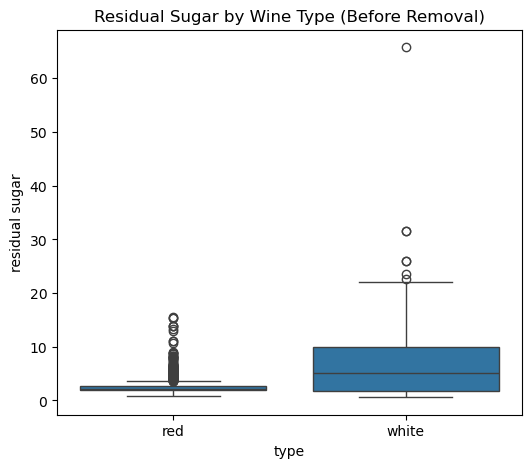

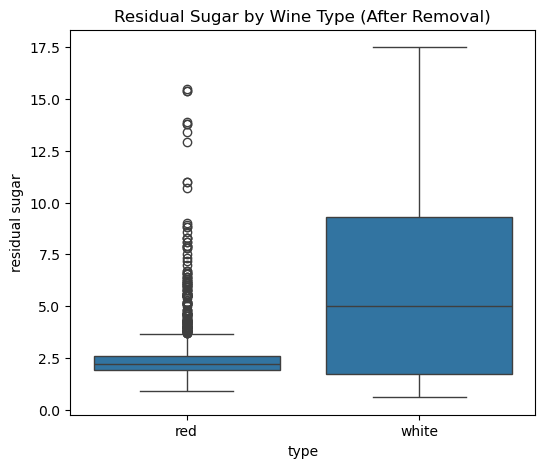

In [132]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='type', y='residual sugar', data=both_wine)
plt.title('Residual Sugar by Wine Type (Before Removal)')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x='type', y='residual sugar', data=both_wine_no_outliers)
plt.title('Residual Sugar by Wine Type (After Removal)')
plt.show()

Binning data essentially means slicing the data into short bits. Slicing the cake into pieces and looking at each piece individually. When we slice pH into 5 and 10 bins, we in the following code examine which slice has the heavist wines (highest average density) 

In [133]:
# 5 bins
ph_bins_5 = pd.cut(both_wine['pH'], bins=5)
density_by_ph_5 = both_wine.groupby(ph_bins_5, observed=True)['density'].mean()
print("Density per pH bin (5 bins):")
print(density_by_ph_5)
print(f"Highest density (5 bins): {density_by_ph_5.idxmax()} with value {density_by_ph_5.max()}")

# 10 bins
ph_bins_10 = pd.cut(both_wine['pH'], bins=10)
density_by_ph_10 = both_wine.groupby(ph_bins_10, observed=True)['density'].mean()
print("\nDensity per pH bin (10 bins):")
print(density_by_ph_10)
print(f"Highest density (10 bins): {density_by_ph_10.idxmax()} with value {density_by_ph_10.max()}")


Density per pH bin (5 bins):
pH
(2.719, 2.978]    0.994801
(2.978, 3.236]    0.994679
(3.236, 3.494]    0.994688
(3.494, 3.752]    0.994887
(3.752, 4.01]     0.993582
Name: density, dtype: float64
Highest density (5 bins): (3.494, 3.752] with value 0.9948868322981367

Density per pH bin (10 bins):
pH
(2.719, 2.849]    0.993112
(2.849, 2.978]    0.994882
(2.978, 3.107]    0.994706
(3.107, 3.236]    0.994664
(3.236, 3.365]    0.994515
(3.365, 3.494]    0.995044
(3.494, 3.623]    0.994942
(3.623, 3.752]    0.994640
(3.752, 3.881]    0.993888
(3.881, 4.01]     0.992665
Name: density, dtype: float64
Highest density (10 bins): (3.365, 3.494] with value 0.9950444950124687


Using 5 bins we notice that the highest avg. density is in the "3.494 - 3.752" with a value of 0.994.

Using 10 bins means we have more data to work with (slicing the cake into more pieces) and we see that the pH range "3.365 - 3.494" has the highest avg. density. 

5 bins gave a broad peak (3.494–3.752), but 10 bins pinpointed the true maximum/optimal pH range for density (3.365–3.494).

What does this actually mean? 

It means that wine density peaks at a mid-range pH (3.365–3.494), not at the highest pH. 

In [134]:
both_wine[['pH', 'density']].corr()

,pH,density
pH,1.000000,0.011686
density,0.011686,1.000000


In [135]:
both_wine[['density', 'quality']].corr()

,density,quality
density,1.000000,-0.305858
quality,-0.305858,1.000000


In [136]:
both_wine[['density', 'alcohol']].corr()


,density,alcohol
density,1.000000,-0.686745
alcohol,-0.686745,1.000000


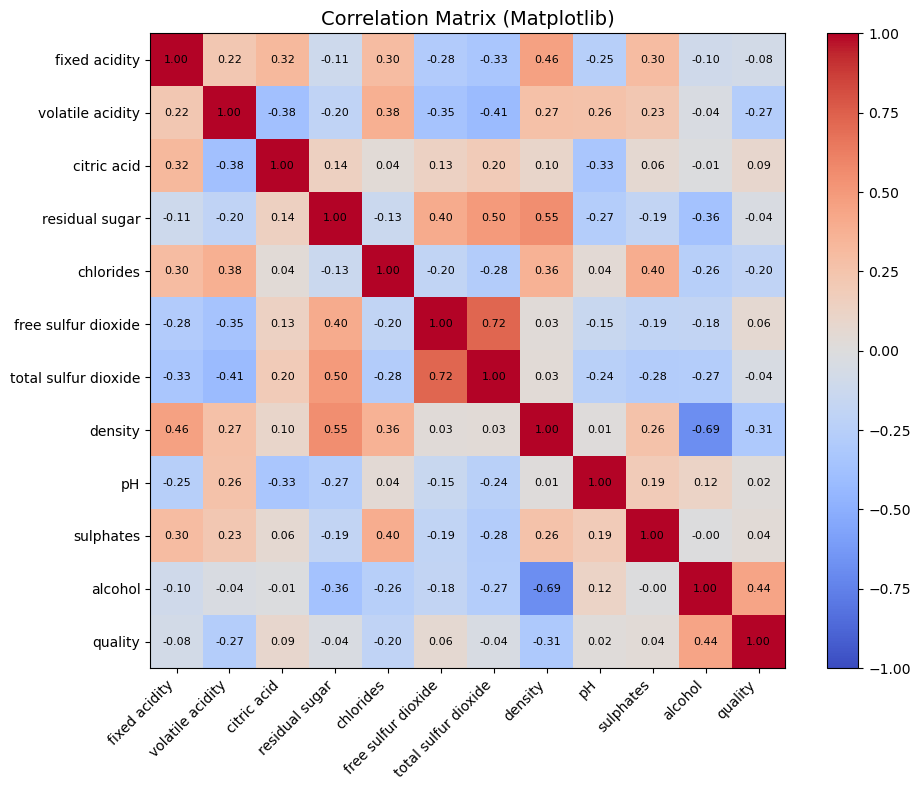

In [137]:
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add color bar
plt.colorbar()

# Add ticks and labels
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)

# Add values to each cell
ax = plt.gca()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                ha='center', va='center', color='black', fontsize=8)

plt.title('Correlation Matrix (Matplotlib)', fontsize=14)
plt.tight_layout()
plt.show()

In [138]:
# 1. View correlation matrix
corr_matrix = both_wine.corr(numeric_only=True)

# 2. Check correlation with 'quality'
quality_corr = corr_matrix['quality'].drop('quality')
quality_corr[(quality_corr.abs() < 0.1) & (quality_corr.abs() > 0)]
print("Weakly correlated with quality:\n", low_corr)

Weakly correlated with quality:
 fixed acidity          -0.076743
citric acid             0.085532
residual sugar         -0.036980
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
pH                      0.019506
sulphates               0.038485
Name: quality, dtype: float64


In [139]:
weak_features = ['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide',
                 'total sulfur dioxide', 'pH', 'sulphates']

both_wine_reduced = both_wine.drop(columns=weak_features)

both_wine_reduced

,volatile acidity,chlorides,density,alcohol,quality,type,type_code
0,0.70,0.076,0.99780,9.4,5,red,1
1,0.88,0.098,0.99680,9.8,5,red,1
2,0.76,0.092,0.99700,9.8,5,red,1
3,0.28,0.075,0.99800,9.8,6,red,1
4,0.70,0.076,0.99780,9.4,5,red,1
...,...,...,...,...,...,...,...
6492,0.21,0.039,0.99114,11.2,6,white,2
6493,0.32,0.047,0.99490,9.6,5,white,2
6494,0.24,0.041,0.99254,9.4,6,white,2
6495,0.29,0.022,0.98869,12.8,7,white,2


Explained variance ratio: [0.44382759 0.24077535]


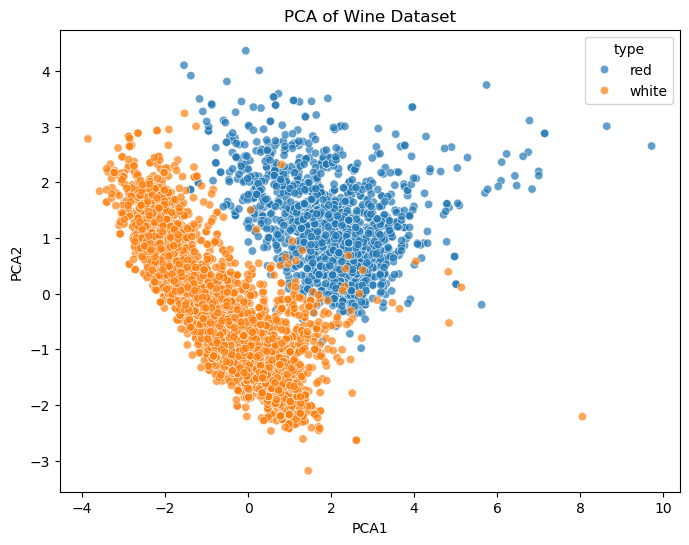

In [ ]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(both_wine_reduced.select_dtypes(include='number'))

# Step 2: Apply PCA
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(scaled_data)

# Step 3: Add PCA results to the DataFrame
both_wine_reduced['PCA1'] = pca_result[:, 0]
both_wine_reduced['PCA2'] = pca_result[:, 1]

# Step 4: Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 5: Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='type', data=both_wine_reduced, alpha=0.7)
plt.title('PCA of Wine Dataset')
plt.show()

In [147]:
random_rows = both_wine_reduced.sample(n=10)

print(random_rows)

      volatile acidity  chlorides  density  alcohol  quality   type  \
326               0.53      0.121  0.99780     11.5        7    red   
1174              0.36      0.079  0.99716      9.5        6    red   
4268              0.26      0.046  0.99583      9.3        5  white   
556               0.53      0.118  1.00020     11.7        6    red   
3512              0.23      0.049  0.99530      9.6        6  white   
2242              0.24      0.050  0.99690      9.5        5  white   
5265              0.21      0.038  0.99523     10.5        7  white   
4338              0.32      0.034  0.99026     12.4        7  white   
940               0.33      0.074  0.99509     12.4        7    red   
2203              0.26      0.052  0.99240      9.8        6  white   

      type_code      PCA1      PCA2  
326           1  1.741659  2.326755  
1174          1  1.709910  0.342390  
4268          2  0.292804 -1.545882  
556           1  2.402557  1.805760  
3512          2 -0.300886 -1